# PREDICTING NEURODEGENERATIVE DISEASES

The source of data is UCI Machine Learning repository.

## Introduction
### About Neurodegenerative diseases
Neurodegenerative diseases are a heterogeneous group of disorders that are characterized by the progressive degeneration of the structure and function of the central nervous system or peripheral nervous system. 
These diseases cause your brain and nerves to deteriorate over time. They can change your personality and cause confusion. They can also destroy your brain’s tissue and nerves.

It cause permanent damage, so symptoms tend to get worse as the disease progresses. New symptoms are also likely to develop over time.
There’s no cure for neurodegenerative diseases, but treatment can still help. Treatment for these diseases tries to reduce symptoms and maintain quality of life. Treatment often involves the use of medications to control symptoms.

Some of the most common symptoms of neurodegenerative diseases include:
memory loss, forgetfulness, apathy, anxiety, agitation, a loss of inhibition, mood changes etc.

Some brain diseases, such as Alzheimer’s disease, may develop as you age. They can slowly impair your memory and thought processes. Other diseases, such as Tay-Sachs disease, are genetic and begin at an early age

Some of Neurodegenerative Diseases are:

    Alzheimer's disease (AD) and other dementias.
    Parkinson's disease (PD) and PD-related disorders.
    Prion disease.
    Motor neurone diseases (MND)
    Huntington's disease (HD)
    Spinocerebellar ataxia (SCA)
    Spinal muscular atrophy (SMA)

from the above lists the most common neurodegenerative diseases include Alzheimer's disease and Parkinson's disease.



The goal of this project is to build a machine learning model to accurately predict the presence of a neurodegenerative disease in an individual as early detection of a neurodegenerative disease for the identification of people who can participate in trials of neuroprotective agents, or ultimately to try and halt disease progression once effective
disease-modifying interventions have been identified.

## Exploratory Data Analysis on the dataset

### Data
The dataset was created by Max Little of the University of Oxford, in collaboration with the National Centre for Voice and Speech, Denver, Colorado, who recorded the speech signals, and can be found https://archive.ics.uci.edu/ml/datasets/Parkinsons

In [1]:
# first we need to import all required python libraries to perform EDA and prediction us ML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,mean_absolute_error

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
# loading data to variable called data
data=pd.read_csv("parkinsons.data")

In [4]:
# Let Explore the top 5 rows of the dataset by using head() method on  pandas DataFrame.
print(data.shape)
data.head()

(195, 24)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
# Let run info() method on DataFrameprint to get the useful information of the dataset.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

The pandas info() function provides the summary of our dataframe. 

So one of important thing in ML practice is Feature Selection, which have great impacts on the performance of our model. 
The features that we use to train our machine learning models will have a promising influence on the performance we achieve.

As we see from above output it turns out that this dataset has 24 columns (including the target variable status) and 195 rows. 
Notice that there are 22 columns with float data-type indicating the presence of only continuous features with no missing 
values in any of the columns, 1 int64(target) and 1 object data types in the dataset. 

Also the data is high dimentional because it have more than  10 columns. So it requires using dimentionality reduction techniques to reduce the columns otherwise it will affect the model performance.

In [6]:
# print the list of columns in the dataset to find the name of the prediction/target variable
print(data.columns)

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


from the above we can see that there are totally 24 columns (23 features/predictor variables and one target variable)as listed below

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

To get more summary statistics of the different features in the dataset I will use the describe() method on DataFrame.

Note that describe() method only gives summary statistics of columns which are continuous in nature and not categorical.

In [7]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


### Visually detecting redundant features

Data visualization is a crucial step in any data exploration. Let's use Seaborn to explore dataset before feature selection using Seaborn's heatmap() function. This will allow us to inspect the pairwise correlations between the features.

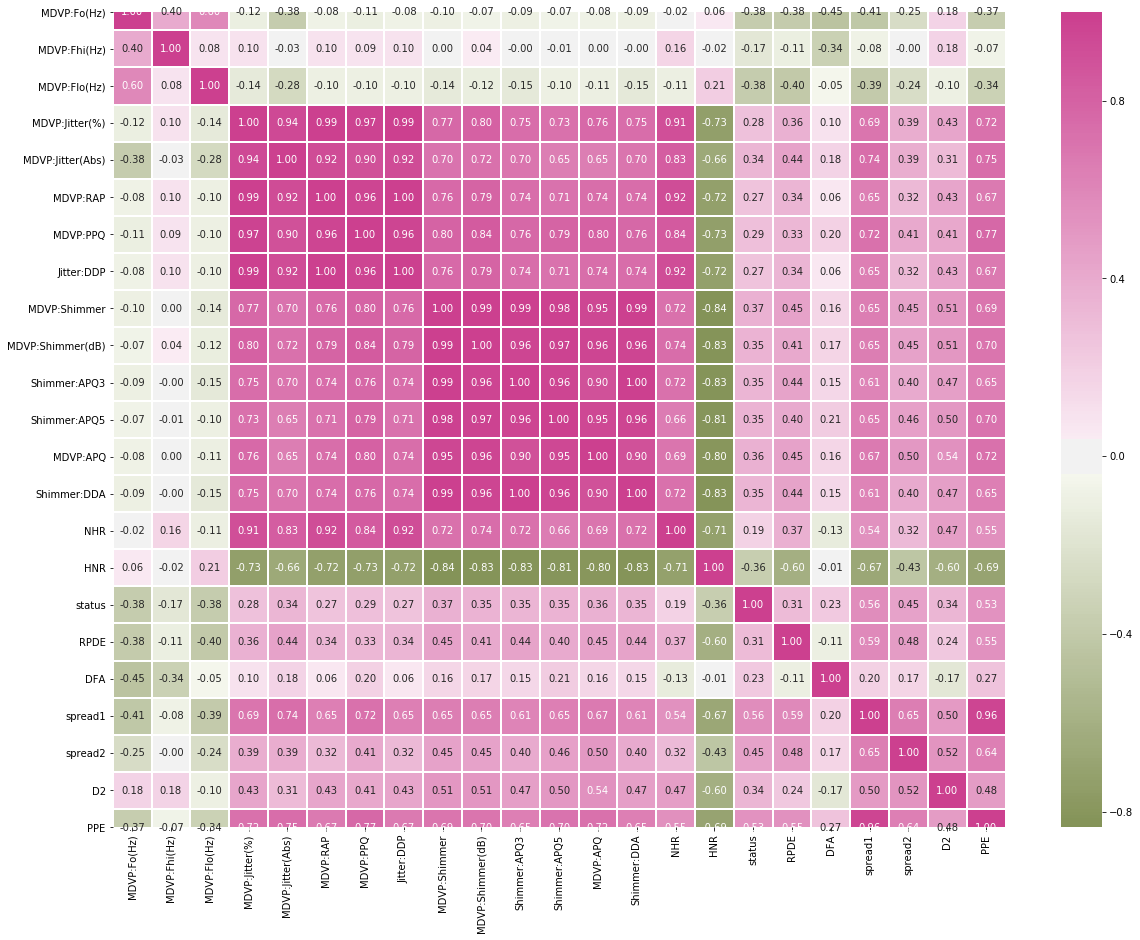

In [8]:
# Let visualize the correlation matrix using seaborn's heatmap function 
cmap = sns.diverging_palette(h_neg=100,h_pos=340,as_cmap=True)
plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(), center=0, cmap=cmap, linewidths=1,annot=True, fmt=".2f")

Let Visualize the correlation matrix by removing dupplicate and unnecessary information. This can be done by the correlation matrix of 1 on the diagonal to focus on important part of the plot.

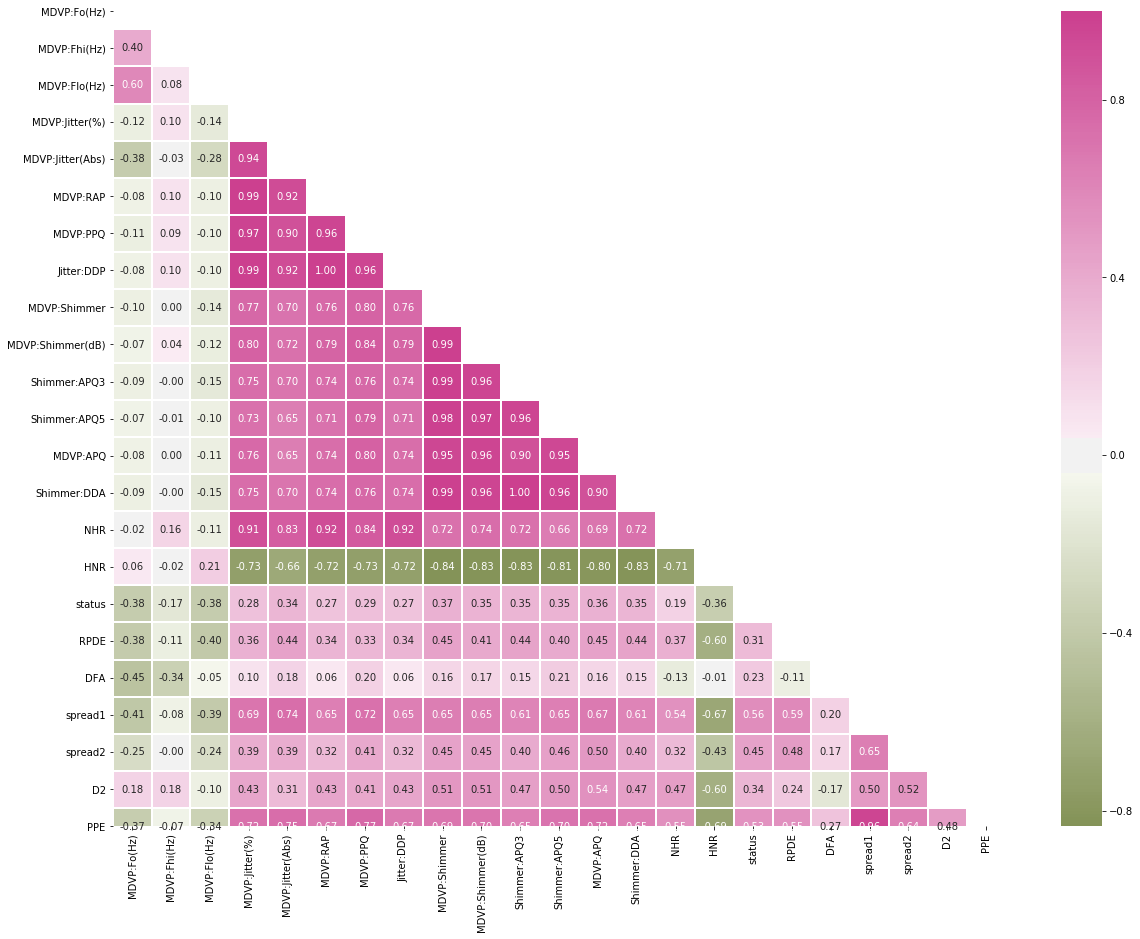

In [9]:
# Create the correlation matrix
corr = data.corr()
# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))
# Draw the heatmap
plt.subplots(figsize=(20,15))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=1,annot=True, fmt=".2f")
plt.show()

as we can see there are strong correlation among many features. features like 'Shimmer:DDA' and 'Shimmer:APQ3', 'Jitter:DDP' and 'MDVP:RAP' having correlation coefficient equal to 1.

In [10]:
# Let deop non numeric field
data=data.drop('name',axis=1)

In [11]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = data.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.95)]

# Drop the features in the to_drop list
reduced_df = data.drop(to_drop, axis=1)

print("The orginal dataframe has {} columns.".format(data.shape[1]))
print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

The orginal dataframe has 23 columns.
The reduced dataframe has 15 columns.


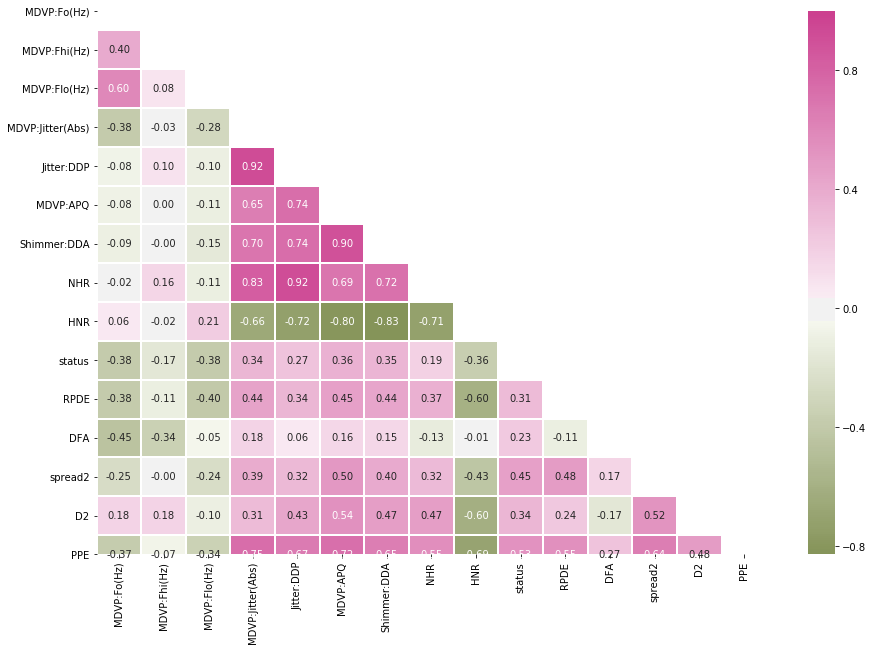

In [12]:
# Let create the correlation matrix on reduced dataframe
corr = reduced_df.corr()
# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))
# Draw the heatmap
plt.subplots(figsize=(15,10))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=1,annot=True, fmt=".2f")
plt.show()

As we see from the above plot, the features with strong correlation has been removed, so that the redundant features will not be used for our model training. 

Before we build a model on our dataset, we should first decide on which feature we want to predict. In this case, we are trying to predict status.

We need to extract the column holding this feature from the dataset and then split the data into a training and test set. The training set will be used to train the model and the test set will be used to check its performance on unseen data.

In [13]:
# Separate the feature we want to predict from the ones to train the model on 
y=reduced_df['status']
X=reduced_df.drop('status',axis=1)

In [14]:
data.corr().status.sort_values()

MDVP:Fo(Hz)        -0.383535
MDVP:Flo(Hz)       -0.380200
HNR                -0.361515
MDVP:Fhi(Hz)       -0.166136
NHR                 0.189429
DFA                 0.231739
Jitter:DDP          0.266646
MDVP:RAP            0.266668
MDVP:Jitter(%)      0.278220
MDVP:PPQ            0.288698
RPDE                0.308567
MDVP:Jitter(Abs)    0.338653
D2                  0.340232
Shimmer:DDA         0.347608
Shimmer:APQ3        0.347617
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ5        0.351148
MDVP:APQ            0.364316
MDVP:Shimmer        0.367430
spread2             0.454842
PPE                 0.531039
spread1             0.564838
status              1.000000
Name: status, dtype: float64

In [15]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(Abs),Jitter:DDP,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread2,D2,PPE
0,119.992,157.302,74.997,0.00007,0.01109,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00008,0.01394,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.00009,0.01633,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00009,0.01505,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.00011,0.01966,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,0.234513,2.332180,0.410335


In [16]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [17]:
# print the the total numbur of prediction/target variabble
print(reduced_df['status'].value_counts())

1    147
0     48
Name: status, dtype: int64


Before we start building the model, first we should identify and determine the types of the problem weather it is classification, regression or other problem.. To do so let visualize the distribution of target column (status) of the dataset using pandas hist() method.

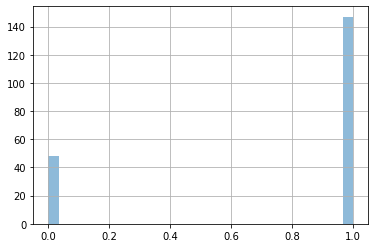

In [18]:
# Let see the distribution of status column
data.status.hist(bins=30,alpha=0.5)
plt.show()

As we see the histogram, it's clear that status column is discret variable, so we should use classification algorithms. 

#### Problem statement
Predict the neurodegenerative deseases
#### Target variable
status
#### Problem type
Classifcation with 2 classes: '0', '1' 
#### Metric
accuracy_score,F1_score, ROC_auc

# Building Machine Learning Model for prediction

Let use the scikit-learn library to create the models. Scikit-learn is the most popular library for modeling the types of data typically stored in DataFrames.

The steps to building and using a model are first define: What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too. Next fit: to capture patterns from provided data. This is the heart of modeling.Then Predict: Just what it sounds like, finally, Evaluate: Determine how accurate the model's predictions are.

## step 1. Split the Data

Let use the train_test_split function to split up the data by passing the argument random_state=123 

Recall, the features are loaded in the DataFrame X and the target is loaded in y.

Now, let create the train and test set of the dataset using the train_test_split function from sklearn's model_selection module with test_size size equal to 30% of the data. Also, let assign some value to a random_state to maintain reproducibility of the results.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=123,test_size=0.3)

## Step 2: Let decide and define the model

In the first case let implement with Logistic regression. Logistic regression is a supervised classification algorithm. In this model dependent or output variable is a category or class. The target is a discrete category or a class (not a continuous variable as in linear regression), for our case, none(1) = parkinson, zero(0) = healthy

Let Create a LogisticRegression model by setting random_state to 123 to ensure same results each run. Specifying a number for random_state ensures to get the same results in each run. This is considered a good practice. We can use any number, and model quality won't depend meaningfully on exactly what value we choose.


In [20]:
lrc=LogisticRegression(random_state=123)

## step 3. Fit the model with training data

In [21]:
lrc.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


## Step 4 : Make Predictions with test data

In [22]:
# Predict labels
y_pred = lrc.predict(X_test) 

## Step 5: Evaluate the model output with relevant evaluation metrics

In [23]:
print("The accuracy of our model on test set is  {:.1%}" .format(accuracy_score(y_test,y_pred)))

The accuracy of our model on test set is  83.1%


In [24]:
print("The accuracy score of our model on training set is {:.1%}" .format(accuracy_score(y_train,lrc.predict(X_train))))

The accuracy score of our model on training set is 89.7%


In [25]:
pd.crosstab(y_test,y_pred)

col_0,0,1
status,,
0,6,9
1,1,43


In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.40      0.55        15
           1       0.83      0.98      0.90        44

    accuracy                           0.83        59
   macro avg       0.84      0.69      0.72        59
weighted avg       0.83      0.83      0.81        59



As we see from the above result our model accurately predicts the presence of a neurodegenerative disease. The final accuracy is around 83% 

In [27]:
# let see by using SVM classifier
from sklearn.svm import SVC
svc = SVC(gamma='scale')
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
print(accuracy_score(y_test,svc.predict(X_test)))

0.8135593220338984


In [29]:
# if this accuracy is much higher than test set accuracy score, we can conclude that our model is didn't generalize well 
print(accuracy_score(y_train,svc.predict(X_train)))

0.8235294117647058


As we see from the above result our model accurately predicts the presence of a neurodegenerative disease. If an accuracy score on training set is much higher than test set accuracy score, we can conclude that our model does not generalize well. From the above case the the accuracy score in training set is not very high compared with accuracy of test set.


## Let us Use XGBoost classifier

Now let convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains. 

In [30]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [31]:
# Let define params dictionary 
params = {"objective":"reg:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 4, 'alpha': 0.1}

## Visualize Boosting Trees and Feature Importance

we can visualize XGBoost models by examining the importance of each feature column in thhe dataset with in the model.

One simple way of doing this involves counting the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear. XGBoost has a plot_importance() function that allows us to do exactly this.

Let instantiate an XGBoost classifier object by calling the XGBClassifier() class from the XGBoost library with the hyper-parameters passed as arguments

In [40]:
# To instantiate an XGBoost classifier object
xg_cl = xgb.XGBClassifier(objective='reg:logistic',learning_rate = 0.1, colsample_bytree = 0.3,max_depth = 5,
                          n_estimators=10,alpha=0.1,seed=123)

In [33]:
xg_cl = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=8)

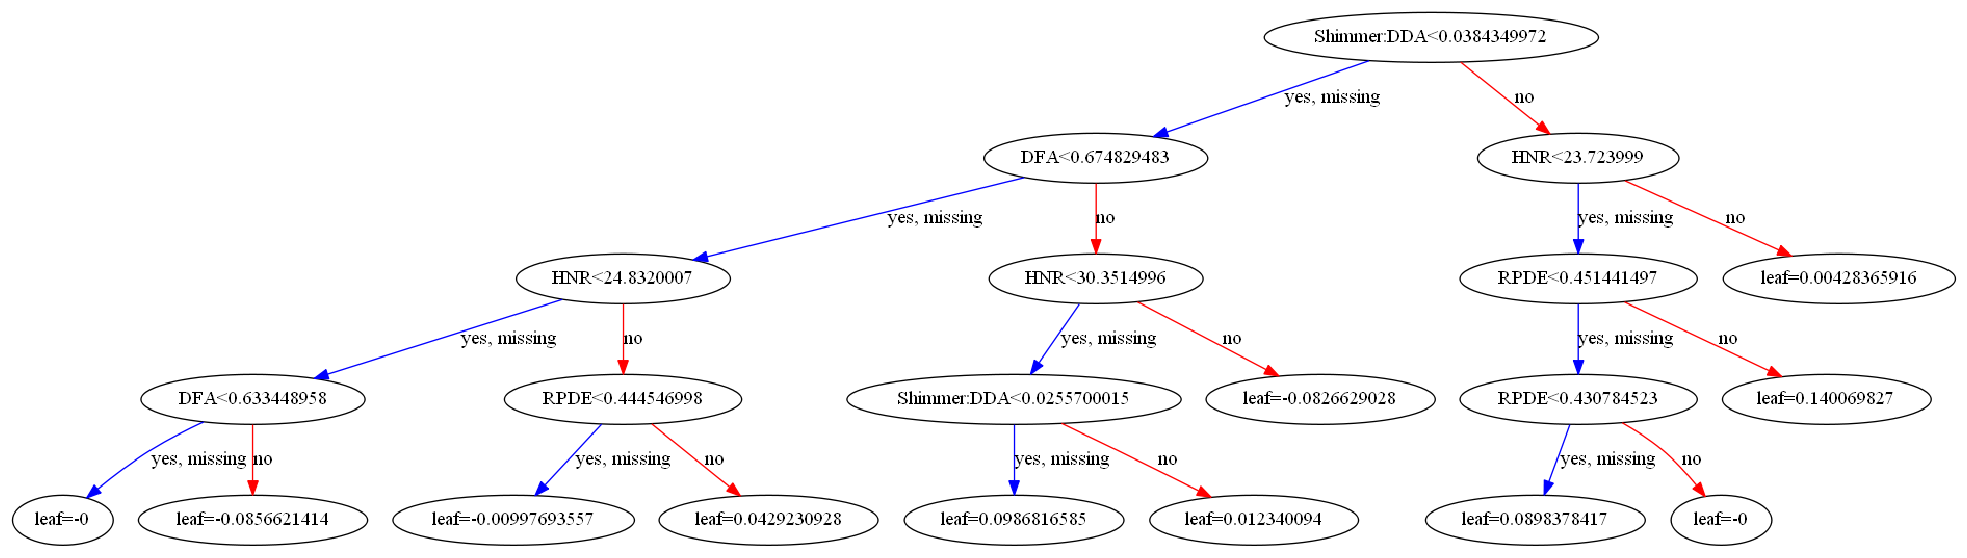

In [35]:
xgb.plot_tree(xg_cl,num_trees=4)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

### Question: 
1. which feature has highest importance score amoung all features? 
2. which feature has lowest importance score amoung all features? 

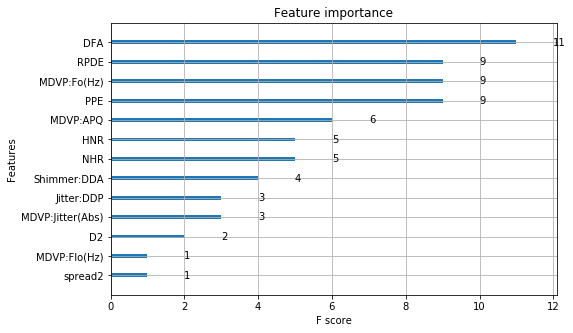

In [37]:
xgb.plot_importance(xg_cl)
plt.rcParams['figure.figsize'] = [8, 5]
plt.show()

As we can see the feature DFA has been given the highest importance score among all the features. 
Features like 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3' and 'MDVP:Jitter(Abs)' have been given the lowest  importance score among all the features

Thus XGBoost also gives us a way to do Feature Selection.


In [ ]:
print("{} rows in test set vs. {} in training set. {} Total Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

Next let Fit the classifier to the training set and make predictions on the test set using the familiar .fit() and .predict() methods.

In [41]:
xg_cl.fit(X_train, y_train)
preds = xg_cl.predict(X_test)
preds

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

### Let Measure the accuracy of the XGBoost Classifier model by k-fold Cross Validation 

XGBoost supports k-fold cross validation via the cv() method. All we need to do is specify the nfolds parameter, which is the number of cross validation sets we want to build. Also, it supports many other parameters such as:

num_boost_round: denotes the number of trees we build (analogous to n_estimators)

metrics: tells the evaluation metrics to be watched during CV

as_pandas: to return the results in a pandas DataFrame.

early_stopping_rounds: finishes training of the model early if the hold-out metric ("error" in our case) does not improve for a given number of rounds.

seed: for reproducibility of results.
This time we will create a hyper-parameter dictionary params which holds all the hyper-parameters and their values as key-value pairs but will exclude the n_estimators from the hyper-parameter dictionary.

We will use these parameters to build a 3-fold cross validation model by invoking XGBoost's cv() method and store the results in a cv_results DataFrame, we also use the Dmatrix object created before. cv_results contains train and test error metrics for each boosting round.


In [42]:
# Let perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3, num_boost_round=10,early_stopping_rounds=10,
                    metrics="error", as_pandas=True, seed=123)

In [43]:
# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))

0.8871793333333333


In [44]:
cv_results

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.079487,0.003626,0.184615,0.054754
1,0.069231,0.016618,0.194872,0.038376
2,0.038462,0.012561,0.133333,0.038376
3,0.038462,0.006281,0.138461,0.043514
4,0.030769,0.016618,0.117949,0.026149
5,0.030769,0.012561,0.112821,0.029009
6,0.028205,0.015806,0.112821,0.014505
7,0.028205,0.019188,0.112821,0.014505
8,0.028205,0.019188,0.102564,0.014505
9,0.028205,0.019188,0.112821,0.019188


cv_results stores the training and test mean and standard deviation of the error per boosting round (tree built) as a DataFrame. From cv_results, the final round 'test-error-mean' is extracted and converted into an accuracy, where accuracy is 1-error. The final accuracy is around 88% 

In [45]:
# Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, 
                  nfold=4, num_boost_round=10, 
                  metrics="auc", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.948272       0.011994       0.825957      0.103654
1        0.977591       0.005735       0.880615      0.084131
2        0.987790       0.008031       0.888455      0.091951
3        0.990077       0.007613       0.906715      0.076243
4        0.992168       0.006201       0.910369      0.071954
5        0.994386       0.005732       0.903833      0.068082
6        0.995031       0.004960       0.920063      0.053700
7        0.996738       0.003033       0.935714      0.040951
8        0.997435       0.002012       0.936480      0.041234
9        0.998385       0.001411       0.935374      0.046059
0.93537375


Similarly, cv_results stores the training and test mean and standard deviation of the auc per boosting round (tree built) as a DataFrame. From cv_results, the final round 'test-auc-mean' is extracted and converted into an accuracy, where accuracy is 1-auc. The final accuracy is around 93% 

## References
1. https://www.nature.com/subjects/neurodegenerative-diseasesg
2. https://www.healthline.com/health/brain-disorders